<a href="https://colab.research.google.com/github/KrishnaYadawad/data-preprocessing/blob/main/handling_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [ ]:
df = pd.read_csv('dirty_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


# changing column name
Changing name of columns as they are not in right format for accessing those columns
example: we can see that it has "price per unit" which we cant access so we change using below method.

In [ ]:
df.columns = ['id','item','quantity','price','total','method','location','date']

# replacing "UNKNOWN" and "ERROR" with nan


In [ ]:
df = df.replace(['UNKNOWN','ERROR'],np.nan)

# changing datatype of columns qauntity, price, total and date

we change it bcz we need quantity, price and total are object type. But they need to be in float dtype

we also change dtype of date to datetime[ns]

In [ ]:
cat = ['quantity','price','total']
df[cat] = df[cat].astype(float)
df['date'] = df['date'].astype('datetime64[ns]')

In [ ]:
df.sample(20)

,id,item,quantity,price,total,method,location,date
3556,TXN_3419352,Salad,3.0,5.0,15.0,Digital Wallet,In-store,2023-10-22
7301,TXN_9525078,Salad,5.0,5.0,25.0,NaN,Takeaway,2023-07-23
5937,TXN_2066115,Salad,4.0,5.0,20.0,Credit Card,In-store,2023-08-18
8853,TXN_4775220,Juice,3.0,3.0,9.0,NaN,Takeaway,2023-07-21
7559,TXN_3785049,Sandwich,4.0,4.0,16.0,NaN,NaN,2023-11-26
9474,TXN_9520855,Cake,4.0,3.0,12.0,NaN,NaN,2023-01-11
3951,TXN_1443201,Cookie,5.0,1.0,5.0,Credit Card,In-store,2023-10-03
2370,TXN_2982995,Salad,1.0,5.0,5.0,Credit Card,Takeaway,2023-04-06
5129,TXN_3373078,Smoothie,4.0,4.0,16.0,Digital Wallet,In-store,2023-12-01
6909,TXN_1811216,Sandwich,1.0,4.0,4.0,Digital Wallet,Takeaway,2023-01-18


# **filling price column**



*   We first find the price of each item than form a dictionary of it
*   we form a function "fill_price" were we check if price==NaN than we replace it with price by using dict "rate".
*   we return price if NaN is not present
*   we use .apply method to use func "fill_price"  



In [ ]:
rate={
    'Coffee':2.0,
    'Cake':3.0,
    'Cookie':1.0,
    'Salad':5.0,
    'Smoothie':4.0,
    'Sandwich':4.0,
    'Juice':3.0,
    'Tea':1.5,
}


In [ ]:
def fill_price(row):
  if pd.isna(row['price']):
    return rate.get(row['item'])
  return row['price']

df['price'] = df.apply(fill_price, axis=1)

In [ ]:
df['price'].isnull().sum()

np.int64(54)

In [ ]:
cols_to_check = ['quantity','price','total']
nan_rows = df[df[cols_to_check].isna().any(axis=1)][cols_to_check]

In [ ]:
nan_rows

,quantity,price,total
2,4.0,1.0,NaN
20,NaN,4.0,20.0
25,3.0,4.0,NaN
31,2.0,1.0,NaN
42,2.0,1.5,NaN
...,...,...,...
9977,2.0,3.0,NaN
9984,NaN,4.0,4.0
9988,5.0,3.0,NaN
9993,2.0,4.0,NaN


since we can see that their are still null values present

To fill it I will check if their is any null values present using .isna() in price column and if it is present then i will replace it with total/quantity (as total = price*quantity) for this case

I use .loc in this bcz whenever their is NaN presnt .isna() return True and replace vlaue in them

In [ ]:
df.loc[df['price'].isna(), 'price'] = df['total'] / df['quantity']

In [ ]:
df['price'].isnull().sum()

np.int64(6)

We can see that their are still null values present. First i will check what are those values

In [ ]:
values = df[df['price'].isna()]
values

,id,item,quantity,price,total,method,location,date
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2289,TXN_7524977,NaN,4.0,NaN,NaN,NaN,NaN,2023-12-09
3779,TXN_7376255,NaN,NaN,NaN,25.0,NaN,In-store,2023-05-27
4152,TXN_9646000,NaN,2.0,NaN,NaN,NaN,In-store,2023-12-14
7597,TXN_1082717,NaN,NaN,NaN,9.0,Digital Wallet,In-store,2023-12-13
9819,TXN_1208561,NaN,NaN,NaN,20.0,Credit Card,NaN,2023-08-19


We can see that in above dataframe there are multiple NaN value in single row for all 6 rows

we can drop this rows as they are missing most of the information

In [ ]:
rows_to_drop = [i for i in values.index]

In [ ]:
df.drop(rows_to_drop, inplace=True)

In [ ]:
df['price'].isnull().sum()

np.int64(0)

# **Replacing null value in item column**

We first reverse the rate dictionary so that we can easily access and replace the null value by seeing the null value in item colum and corresponding price column and map the corresponding value in reverse_dict and replcae it with NaN

In [ ]:
reverse_dict = {v: k for k, v in rate.items()}
reverse_dict

{2.0: 'Coffee',
 3.0: 'Juice',
 1.0: 'Cookie',
 5.0: 'Salad',
 4.0: 'Sandwich',
 1.5: 'Tea'}

In [ ]:
def replace_item(row):
  if pd.isna(row['item']):
    return reverse_dict.get(row['price'])
  return row['item']

df['item'] = df.apply(replace_item, axis=1)

In [ ]:
df['item'].isnull().sum()

np.int64(0)

# **filling quantity column with missing values**

we replace NaN with formual quantity = total/price(as total = price*quantity)



In [ ]:
df.loc[df['quantity'].isna(),'quantity'] = df['total'] / df['price']

In [ ]:
df['quantity'].isnull().sum()

np.int64(20)

we can see that still their are null values presnt

In [ ]:
null_quantity_values = df[df['quantity'].isna()]
null_quantity_values

,id,item,quantity,price,total,method,location,date
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
2796,TXN_9188692,Cake,NaN,3.0,NaN,Credit Card,NaN,2023-12-01
3203,TXN_4565754,Smoothie,NaN,4.0,NaN,Digital Wallet,Takeaway,2023-10-06
3224,TXN_6297232,Coffee,NaN,2.0,NaN,NaN,NaN,2023-04-07
3401,TXN_3251829,Tea,NaN,1.5,NaN,Digital Wallet,In-store,2023-07-25
4257,TXN_6470865,Coffee,NaN,2.0,NaN,Digital Wallet,Takeaway,2023-09-18
5841,TXN_5884081,Cookie,NaN,1.0,NaN,Digital Wallet,In-store,2023-07-05


to replace those values we do it by
* Creating a new dataframe and converting it to dictionary
* in that dataframe we have item with corresponding most time orderd qauntity. we do it by using df.groupby()

In [ ]:
new_df = df.groupby('item')['quantity'].agg(lambda x: x.mode()[0])
new_df

,quantity
item,
Cake,5.0
Coffee,5.0
Cookie,2.0
Juice,3.0
Salad,5.0
Sandwich,5.0
Smoothie,5.0
Tea,2.0


In [ ]:
qauntity_dict = {}
qauntity_dict = new_df.to_dict()

In [ ]:
qauntity_dict

{'Cake': 5.0,
 'Coffee': 5.0,
 'Cookie': 2.0,
 'Juice': 3.0,
 'Salad': 5.0,
 'Sandwich': 5.0,
 'Smoothie': 5.0,
 'Tea': 2.0}

In [ ]:
df.loc[df['quantity'].isna(),'quantity'] = df['item'].map(qauntity_dict)

In [ ]:
df['quantity'].isnull().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
id,0
item,0
quantity,0
price,0
total,499
method,3175
location,3958
date,460


# **filling total column with null values**

* we simply multiply quantity and price than we get total value
* we can do it bcz quantity and price columns do not have null values now


In [ ]:
df.loc[df['total'].isna(),'total'] = df['quantity'] * df['price']

In [ ]:
df.isnull().sum()

,0
id,0
item,0
quantity,0
price,0
total,0
method,3175
location,3958
date,460


# Droping features which are less effective for analysis or ML model building

* we drop method column bcz a customer can do payment in any method(it is random/depending on the situation) and payment method will not effect the analysis as this column is not related with any column in dataset

* we also drop location as it is not important to know how the customer will take order(Instore or takeaway) it depends on CUSTOMER BEHAVIOR OR ACCORDING TO THEIR COMFORT

In [ ]:
df.drop('method',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
item,0
quantity,0
price,0
total,0
location,3958
date,460


In [ ]:
df.sample(10)

,id,item,quantity,price,total,location,date
6392,TXN_7814715,Cookie,5.0,1.0,5.0,NaN,2023-04-24
6924,TXN_3131168,Sandwich,3.0,4.0,12.0,NaN,2023-03-24
8824,TXN_2785654,Tea,1.0,1.5,1.5,Takeaway,2023-02-21
8525,TXN_7155957,Salad,5.0,5.0,25.0,In-store,2023-02-22
5408,TXN_2276722,Salad,2.0,5.0,10.0,Takeaway,2023-12-21
4873,TXN_2227781,Cake,1.0,3.0,3.0,Takeaway,2023-01-21
1807,TXN_2127588,Cake,4.0,3.0,12.0,In-store,2023-07-17
3923,TXN_6710660,Salad,2.0,5.0,10.0,In-store,2023-02-08
3322,TXN_4081759,Coffee,2.0,2.0,4.0,NaN,2023-09-30
6615,TXN_8181326,Tea,5.0,1.5,7.5,NaN,2023-02-28


In [ ]:
df['location'].unique()

array(['Takeaway', 'In-store', nan], dtype=object)

In [ ]:
print(f"Total Null values present(in percent): {((df['location'].isnull().mean())*100)}%")

Total Null values present(in percent): 39.60376225735441%


In [ ]:
df.drop('location',axis=1,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1167c3f6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1167c4ca10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1167e103d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1167c4de90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1167c4e790>],
 'means': []}

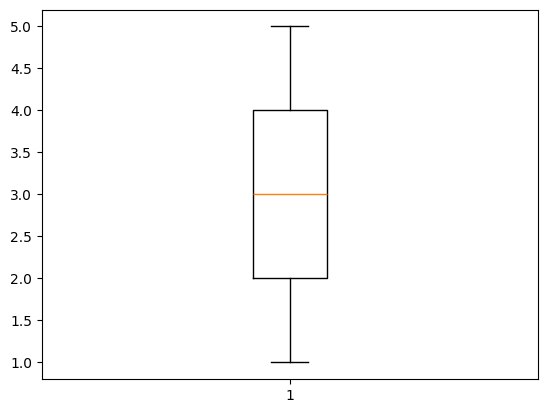

In [ ]:
plt.boxplot(x=df['quantity'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1167ca8350>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1167ca97d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1167c9f910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1167caab10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1167cab190>],
 'means': []}

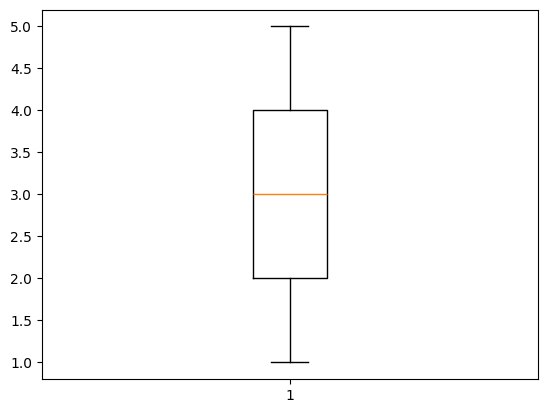

In [ ]:
plt.boxplot(x = df['price'])

**We can see we have outlier**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1167b48550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1167b308d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1167b3f010>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1167b31cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1167b32510>],
 'means': []}

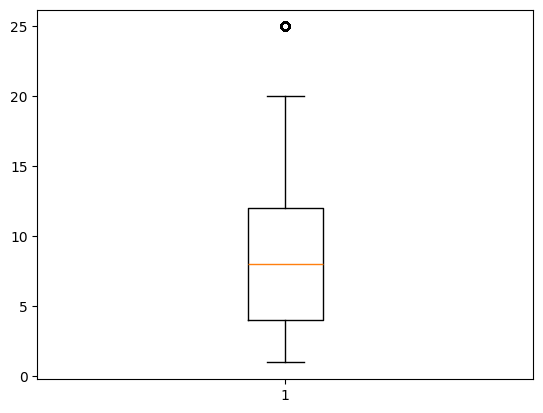

In [ ]:
plt.boxplot(x = df['total'])

**we can see that outlier is actually not a outlier as every value is +ve and order and payed. We can ignore this outlier**

In [ ]:
Q1 = df['total'].quantile(0.25)
Q3 = df['total'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total'] < (Q1 - 1.5 * IQR)) | (df['total'] > (Q3 + 1.5 * IQR))]
outliers


,id,item,quantity,price,total,date
10,TXN_2548360,Salad,5.0,5.0,25.0,2023-11-07
51,TXN_6342161,Salad,5.0,5.0,25.0,2023-01-08
52,TXN_8914892,Salad,5.0,5.0,25.0,2023-03-15
96,TXN_5220895,Salad,5.0,5.0,25.0,2023-06-10
100,TXN_9517146,Salad,5.0,5.0,25.0,2023-10-30
...,...,...,...,...,...,...
9791,TXN_1232346,Salad,5.0,5.0,25.0,2023-01-04
9805,TXN_9506076,Salad,5.0,5.0,25.0,2023-01-17
9879,TXN_6393305,Salad,5.0,5.0,25.0,2023-10-19
9908,TXN_8922585,Salad,5.0,5.0,25.0,2023-06-22


In [ ]:
df.isnull().sum()

,0
id,0
item,0
quantity,0
price,0
total,0
date,460


**We ffill the date data**

In [ ]:
df['date'].fillna(method='ffill',inplace=True)

/tmp/ipython-input-3362318285.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date'].fillna(method='ffill',inplace=True)
/tmp/ipython-input-3362318285.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['date'].fillna(method='ffill',inplace=True)


In [ ]:
df['date'].isnull().sum()

np.int64(0)

In [ ]:
(df.isnull().mean())*100

,0
id,0.0
item,0.0
quantity,0.0
price,0.0
total,0.0
date,0.0


In [ ]:
pd.reset_option('display.max_rows')

# **Detecting Outliers**

In [ ]:
df.head()

,id,item,quantity,price,total,date
0,TXN_1961373,Coffee,2.0,2.0,4.0,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,2023-06-11


## Z-Score

used when data is normally distributed

<Axes: xlabel='quantity', ylabel='Density'>

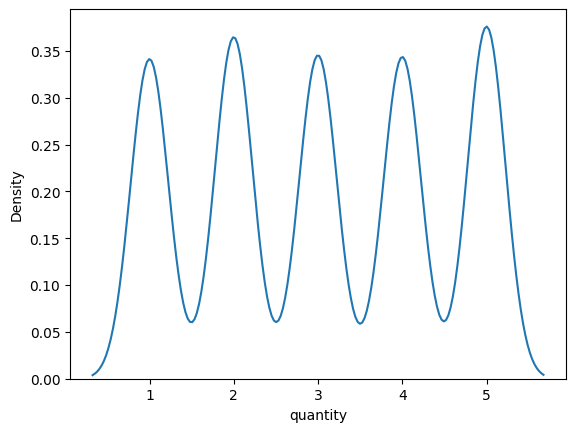

In [ ]:
sns.kdeplot(x=df['quantity'])

In [ ]:
df.shape

(9994, 6)

In [ ]:
df['quantity'].skew()

np.float64(-0.007151440402606849)

In [ ]:
df['quantity'].value_counts()

,count
quantity,
5.0,2122
2.0,2058
3.0,1949
4.0,1939
1.0,1926


<Axes: xlabel='total', ylabel='Density'>

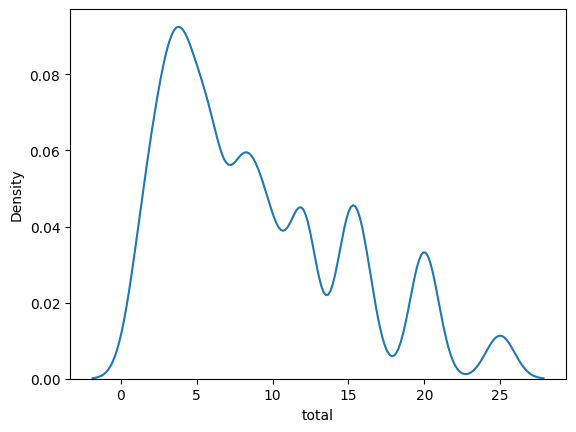

In [ ]:
sns.kdeplot(x=df['total'])

In [ ]:
df['total'].skew()

np.float64(0.8195758902954374)

((array([-3.81046107, -3.58530095, -3.46168628, ...,  3.46168628,
          3.58530095,  3.81046107]),
  array([ 1.,  1.,  1., ..., 25., 25., 25.])),
 (np.float64(5.743555086841234),
  np.float64(8.936461877126273),
  np.float64(0.9556084491706505)))

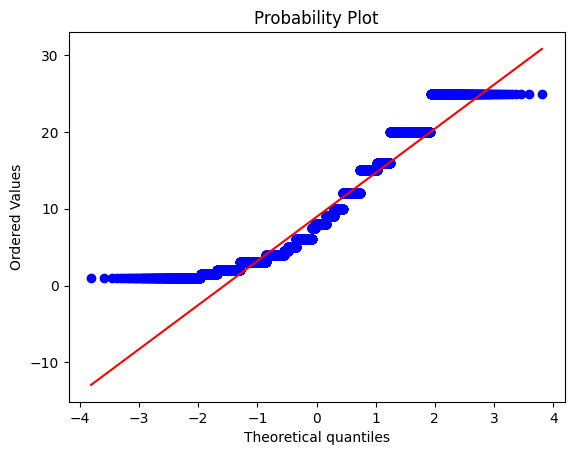

In [ ]:
import scipy.stats as stats

stats.probplot(df['total'], dist='norm', plot=plt)

In [ ]:
df['log_transform'] = df['total'].apply(np.log1p)

<Axes: xlabel='log_transform', ylabel='Density'>

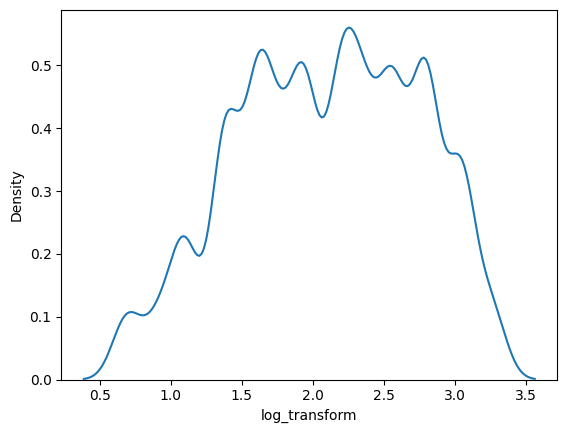

In [ ]:
sns.kdeplot(x=df['log_transform'])

In [ ]:
df['log_transform'].skew()

np.float64(-0.18521832662739066)

((array([-3.81046107, -3.58530095, -3.46168628, ...,  3.46168628,
          3.58530095,  3.81046107]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 3.25809654, 3.25809654,
         3.25809654])),
 (np.float64(0.6317656931037559),
  np.float64(2.103710762297679),
  np.float64(0.9852228039960859)))

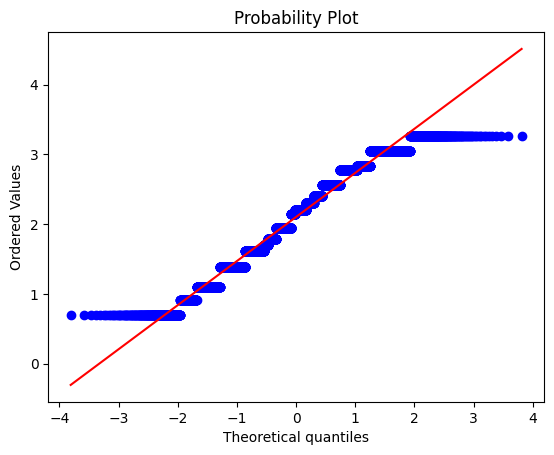

In [ ]:
stats.probplot(df['log_transform'], dist='norm', plot=plt)

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')

df['yeo-johnson'] = pt.fit_transform(df[['total']])

<Axes: xlabel='yeo-johnson', ylabel='Density'>

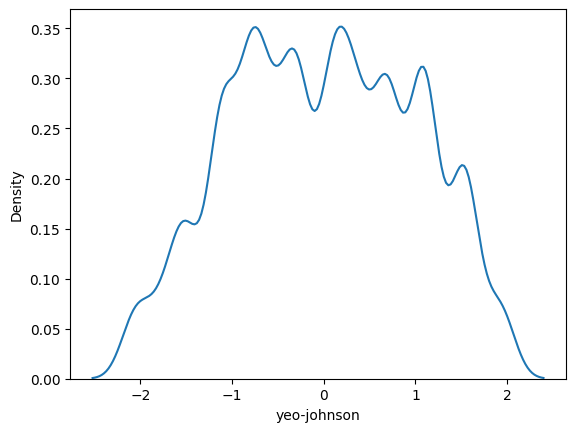

In [ ]:
sns.kdeplot(x=df['yeo-johnson'])

In [ ]:
df['yeo-johnson'].skew()

np.float64(-0.027125557764171408)

((array([-3.81046107, -3.58530095, -3.46168628, ...,  3.46168628,
          3.58530095,  3.81046107]),
  array([-2.04571248, -2.04571248, -2.04571248, ...,  1.92175322,
          1.92175322,  1.92175322])),
 (np.float64(0.9864551106617646),
  np.float64(-8.792247238841943e-17),
  np.float64(0.9861020106801209)))

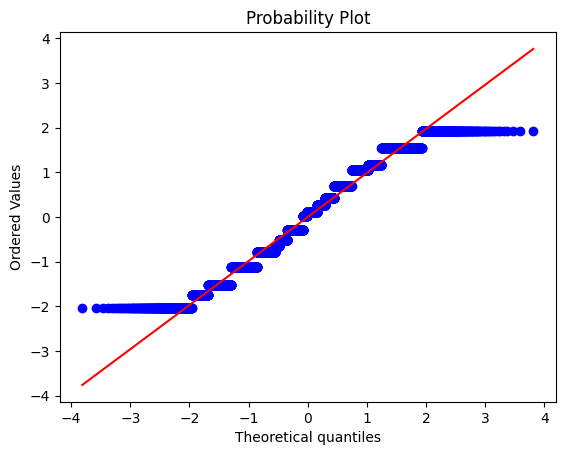

In [ ]:
stats.probplot(df['yeo-johnson'], dist='norm', plot=plt)

In [ ]:
# skewness of yeo-johnson > skewness of log i.e skew(yeo-johnson) is closer to 0

df['total'] = df['yeo-johnson']

In [ ]:
df['total'].value_counts()

,count
total,
-0.290710,1019
0.700950,996
-0.793673,969
-1.114006,969
1.532493,794
1.053925,767
0.101224,720
0.424550,547
-1.512048,520


In [ ]:
df.describe()

,quantity,price,total,date,log_transform,reciporcal_trans,yeo-johnson
count,9994.000000,9994.000000,9.994000e+03,9994,9994.000000,9994.000000,9.994000e+03
mean,3.027316,2.947018,8.496083e-17,2023-07-01 23:38:57.802681856,2.103711,0.198738,8.496083e-17
min,1.000000,1.000000,-2.045712e+00,2023-01-01 00:00:00,0.693147,0.040000,-2.045712e+00
25%,2.000000,2.000000,-7.936730e-01,2023-04-01 00:00:00,1.609438,0.083333,-7.936730e-01
50%,3.000000,3.000000,1.012236e-01,2023-07-02 00:00:00,2.197225,0.125000,1.012236e-01
75%,4.000000,4.000000,7.009500e-01,2023-10-02 00:00:00,2.564949,0.250000,7.009500e-01
max,5.000000,5.000000,1.921753e+00,2023-12-31 00:00:00,3.258097,1.000000,1.921753e+00
std,1.421115,1.280006,1.000050e+00,NaN,0.641044,0.186792,1.000050e+00


In [ ]:
df.drop(columns=['log_transform','yeo-johnson'],inplace=True,axis=1)

In [ ]:
df.describe()

,quantity,price,total,date,reciporcal_trans
count,9994.000000,9994.000000,9.994000e+03,9994,9994.000000
mean,3.027316,2.947018,8.496083e-17,2023-07-01 23:38:57.802681856,0.198738
min,1.000000,1.000000,-2.045712e+00,2023-01-01 00:00:00,0.040000
25%,2.000000,2.000000,-7.936730e-01,2023-04-01 00:00:00,0.083333
50%,3.000000,3.000000,1.012236e-01,2023-07-02 00:00:00,0.125000
75%,4.000000,4.000000,7.009500e-01,2023-10-02 00:00:00,0.250000
max,5.000000,5.000000,1.921753e+00,2023-12-31 00:00:00,1.000000
std,1.421115,1.280006,1.000050e+00,NaN,0.186792


In [ ]:
print("highest allowed:",df['total'].mean()+3*df['total'].std())
print("lowest allowed:",df['total'].mean()-3*df['total'].std())

highest allowed: 3.0001501013185727
lowest allowed: -3.0001501013185727


In [ ]:
#trimming
new_df = df[(df['total']>3.0001501013185727) | (df['total']<-3.0001501013185727)]
new_df

,id,item,quantity,price,total,date,reciporcal_trans


In [ ]:
#capping
df['total'] = np.where(
    df['total'] > 3.0001501013185727,
    3.0001501013185727,
    np.where(
        df['total'] < -3.0001501013185727,
        -3.0001501013185727,
        df['total']),
)

In [ ]:
df.describe()

,quantity,price,total,date,reciporcal_trans
count,9994.000000,9994.000000,9.994000e+03,9994,9994.000000
mean,3.027316,2.947018,8.496083e-17,2023-07-01 23:38:57.802681856,0.198738
min,1.000000,1.000000,-2.045712e+00,2023-01-01 00:00:00,0.040000
25%,2.000000,2.000000,-7.936730e-01,2023-04-01 00:00:00,0.083333
50%,3.000000,3.000000,1.012236e-01,2023-07-02 00:00:00,0.125000
75%,4.000000,4.000000,7.009500e-01,2023-10-02 00:00:00,0.250000
max,5.000000,5.000000,1.921753e+00,2023-12-31 00:00:00,1.000000
std,1.421115,1.280006,1.000050e+00,NaN,0.186792


{'whiskers': [<matplotlib.lines.Line2D at 0x7f115f572110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f115f573ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f115f048d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f115f323a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f115f322b10>],
 'means': []}

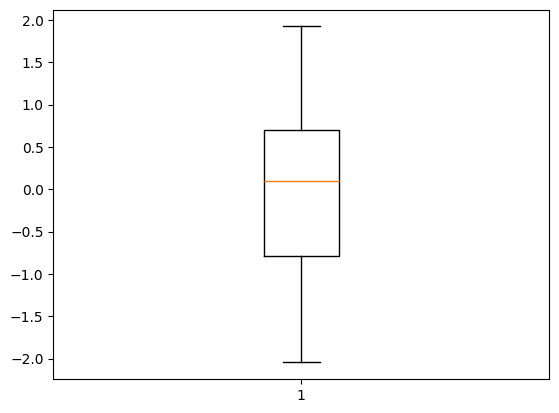

In [ ]:
plt.boxplot(df['total'])

((array([-3.81046107, -3.58530095, -3.46168628, ...,  3.46168628,
          3.58530095,  3.81046107]),
  array([-2.04571248, -2.04571248, -2.04571248, ...,  1.92175322,
          1.92175322,  1.92175322])),
 (np.float64(0.9864551106617646),
  np.float64(-8.792247238841943e-17),
  np.float64(0.9861020106801209)))

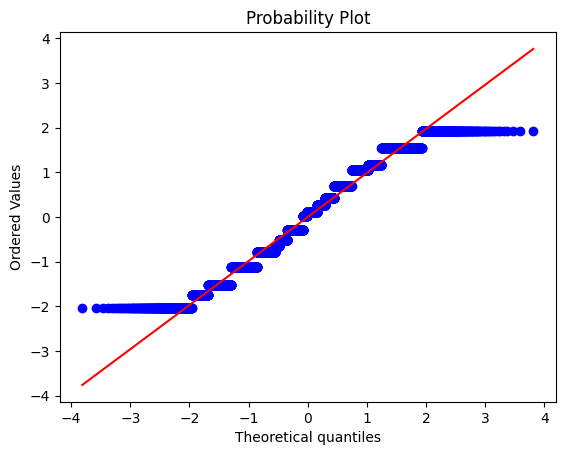

In [ ]:
stats.probplot(df['total'],dist='norm',plot=plt)